### Tests de entrenamiento para el conjunto de datos IRIS 

Importamos todas las librerias y modulos necesarios

In [1]:
from Neural_Network.layer import Layer
from data.load_data import load_iris_data
from Neural_Network.neural_network import NeuralNetwork
from sklearn.model_selection import train_test_split
from Neural_Network.preprocessing import preprocess_data
from Neural_Network.activations import softmax, softmax_derivate, relu, relu_derivate, tanh, tanh_derivate, sigmoid, sigmoid_derivate
from Neural_Network import optimizers
import numpy as np
from Neural_Network.visualizations import plot_confusion_matrix, roc_curve

Cargamos los datos de iris y preprocesamos los datos

In [2]:
X, y = load_iris_data() 
X, y = preprocess_data(X, y.reshape(-1, 1))

Dividimos los datos en conjuntos de entrenamiento y prueba

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Inicializamos la red neuronal y agregamos capas a esta

In [4]:
nn = NeuralNetwork()
nn.add_layer(Layer(4, 5, activation_func=relu, activation_derivate=relu_derivate))
nn.add_layer(Layer(5, 3, activation_func=softmax, activation_derivate=softmax_derivate))

Evaluamos la precisión antes y después de entrenar la red neuronal

In [5]:
accuracy = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("accuracy before training: ", accuracy)
(acc1, loss1) = optimizers.gradient_descent(nn, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)
new_accuracy = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("accuracy after training: ", new_accuracy)

accuracy before training:  0.26666666666666666
epoch   0 - Loss 0.49732, Accuracy 0.66667
epoch  10 - Loss 0.03635, Accuracy 0.91667
epoch  20 - Loss 0.00632, Accuracy 0.95833
epoch  30 - Loss 0.00256, Accuracy 0.95833
epoch  40 - Loss 0.00140, Accuracy 0.95833
epoch  50 - Loss 0.00089, Accuracy 0.95833
epoch  60 - Loss 0.00061, Accuracy 0.95833
epoch  70 - Loss 0.00044, Accuracy 0.95833
epoch  80 - Loss 0.00033, Accuracy 0.95833
epoch  90 - Loss 0.00026, Accuracy 0.95833
epoch 100 - Loss 0.00021, Accuracy 0.95833
epoch 110 - Loss 0.00017, Accuracy 0.95833
epoch 120 - Loss 0.00014, Accuracy 0.95833
epoch 130 - Loss 0.00012, Accuracy 0.95833
epoch 140 - Loss 0.00010, Accuracy 0.95833
epoch 150 - Loss 0.00009, Accuracy 0.95833
epoch 160 - Loss 0.00008, Accuracy 0.95833
epoch 170 - Loss 0.00007, Accuracy 0.95833
epoch 180 - Loss 0.00006, Accuracy 0.95833
epoch 190 - Loss 0.00005, Accuracy 0.95833
epoch 200 - Loss 0.00005, Accuracy 0.95833
epoch 210 - Loss 0.00004, Accuracy 0.95833
epoch 2

Ahora dibujamos la matriz de confusión

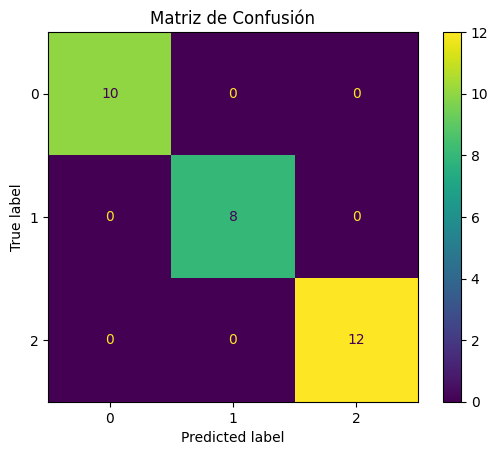

In [6]:
y_pred = [nn.feedforward(x) for x in X_test]
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
plot_confusion_matrix(y_test, y_pred)

Ahora realizaremos la misma prueba pero añadiendo más capas y cambiando la función de activación

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
nn = NeuralNetwork()
nn.add_layer(Layer(4, 10, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn.add_layer(Layer(10, 5, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn.add_layer(Layer(5, 3, activation_func=softmax, activation_derivate=softmax_derivate))

In [9]:
accuracy = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("accuracy before training: ", accuracy)
(acc1, loss1) = optimizers.gradient_descent(nn, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)
new_accuracy = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("accuracy after training: ", new_accuracy)

accuracy before training:  0.3
epoch   0 - Loss 1.31109, Accuracy 0.41667
epoch  10 - Loss 0.85254, Accuracy 0.70833
epoch  20 - Loss 0.56233, Accuracy 0.70833
epoch  30 - Loss 0.39707, Accuracy 0.70833
epoch  40 - Loss 0.30654, Accuracy 0.70833
epoch  50 - Loss 0.25207, Accuracy 0.70833
epoch  60 - Loss 0.21598, Accuracy 0.70833
epoch  70 - Loss 0.19054, Accuracy 0.75000
epoch  80 - Loss 0.17200, Accuracy 0.91667
epoch  90 - Loss 0.15788, Accuracy 0.91667
epoch 100 - Loss 0.14665, Accuracy 0.95833
epoch 110 - Loss 0.13807, Accuracy 1.00000
epoch 120 - Loss 0.13229, Accuracy 1.00000
epoch 130 - Loss 0.12880, Accuracy 1.00000
epoch 140 - Loss 0.12632, Accuracy 1.00000
epoch 150 - Loss 0.12343, Accuracy 1.00000
epoch 160 - Loss 0.11930, Accuracy 1.00000
epoch 170 - Loss 0.11389, Accuracy 1.00000
epoch 180 - Loss 0.10760, Accuracy 1.00000
epoch 190 - Loss 0.10092, Accuracy 1.00000
epoch 200 - Loss 0.09426, Accuracy 1.00000
epoch 210 - Loss 0.08788, Accuracy 1.00000
epoch 220 - Loss 0.0819

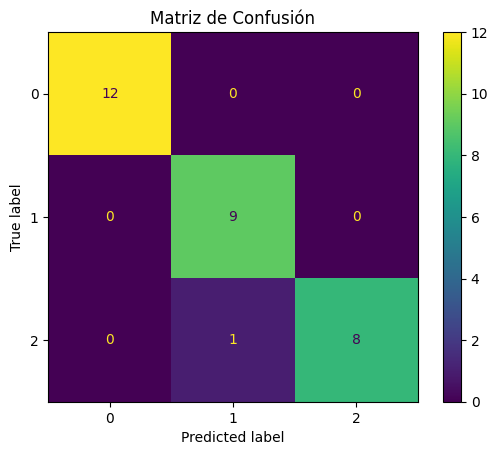

In [10]:
y_pred = [nn.feedforward(x) for x in X_test]
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
plot_confusion_matrix(y_test, y_pred)

Como podemos ver en los resultados, nos damos cuenta que el accuracy bajó en relación con el anterior modelo:

$$ \text{Accuracy}_{1ermodelo}=1$$

$$ \text{Accuracy}_{2domodelo}=0.96$$


Por lo que podemos llegar a la conclusión de que la neurona funciona bien aún poniendo más capas o cambiando las funciones de activación, aunque a simple vista parezca que funcione mucho mejor el primer modelo, hay que tener en cuenta la inicialización de los datos.

### Test de entrenamiento del conjunto de datos DIGITS

Cargamos y preprocesamos los datos del conjunto de datos DIGITS

In [11]:
from data.load_data import load_digits_data
X, y = load_digits_data()
X, y = preprocess_data(X, y.reshape(-1, 1))

Dividimos los datos en conjunto de test y entrenamiento

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Inicializamos la red neuronal y entrenamos

In [13]:
nn = NeuralNetwork()
nn.add_layer(Layer(64, 5, activation_func=tanh, activation_derivate=tanh_derivate))
nn.add_layer(Layer(5, 10, activation_func=softmax, activation_derivate=softmax_derivate))

In [14]:
accuracy = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("accuracy before training: ", accuracy)
(acc1, loss1) = optimizers.gradient_descent(nn, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)
new_accuracy = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("accuracy after training: ", new_accuracy)

accuracy before training:  0.1361111111111111
epoch   0 - Loss 0.49761, Accuracy 0.42014
epoch  10 - Loss 0.07448, Accuracy 0.77083
epoch  20 - Loss 0.04025, Accuracy 0.81597
epoch  30 - Loss 0.03077, Accuracy 0.82986
epoch  40 - Loss 0.02524, Accuracy 0.85764
epoch  50 - Loss 0.02332, Accuracy 0.87153
epoch  60 - Loss 0.01799, Accuracy 0.86458
epoch  70 - Loss 0.01592, Accuracy 0.87153
epoch  80 - Loss 0.01429, Accuracy 0.86458
epoch  90 - Loss 0.01181, Accuracy 0.86806
epoch 100 - Loss 0.01049, Accuracy 0.87847
epoch 110 - Loss 0.00931, Accuracy 0.88194
epoch 120 - Loss 0.00796, Accuracy 0.88542
epoch 130 - Loss 0.00673, Accuracy 0.88889
epoch 140 - Loss 0.00622, Accuracy 0.89236
epoch 150 - Loss 0.00580, Accuracy 0.88889
epoch 160 - Loss 0.00557, Accuracy 0.88889
epoch 170 - Loss 0.00541, Accuracy 0.88542
epoch 180 - Loss 0.00502, Accuracy 0.88542
epoch 190 - Loss 0.00468, Accuracy 0.89236
epoch 200 - Loss 0.00379, Accuracy 0.89236
epoch 210 - Loss 0.00312, Accuracy 0.88889
epoch 22

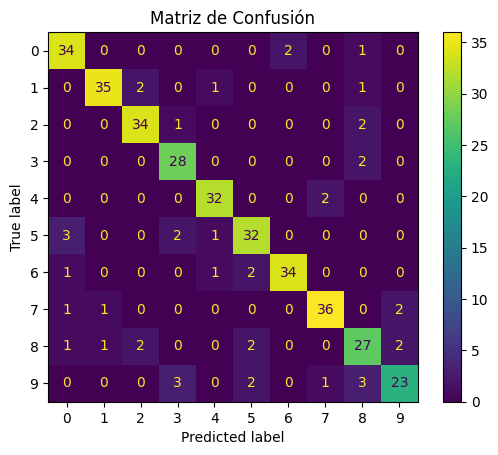

In [15]:
y_pred = [nn.feedforward(x) for x in X_test]
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
plot_confusion_matrix(y_test, y_pred)

Como podemos observar, con este dataset el modelo entrena bien, obteniendo un accuracy del *83%*

Ahora vamos a probar añadiendo más capas y cambiando las funciones de activación

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
nn = NeuralNetwork()
nn.add_layer(Layer(64, 32, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn.add_layer(Layer(32, 16, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn.add_layer(Layer(16, 8, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn.add_layer(Layer(8, 10, activation_func=softmax, activation_derivate=softmax_derivate))

In [18]:
accuracy = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("accuracy before training: ", accuracy)
(acc1, loss1) = optimizers.gradient_descent(nn, X_train, y_train, NeuralNetwork.accuracy, epochs=250, learning_rate=0.01)
new_accuracy = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("accuracy after training: ", new_accuracy)

accuracy before training:  0.08888888888888889
epoch   0 - Loss 2.81416, Accuracy 0.24653
epoch  10 - Loss 1.32058, Accuracy 0.70833
epoch  20 - Loss 0.35193, Accuracy 0.82986
epoch  30 - Loss 0.12770, Accuracy 0.85764
epoch  40 - Loss 0.05956, Accuracy 0.87500
epoch  50 - Loss 0.03605, Accuracy 0.89931
epoch  60 - Loss 0.02683, Accuracy 0.90625
epoch  70 - Loss 0.02337, Accuracy 0.92014
epoch  80 - Loss 0.02044, Accuracy 0.92708
epoch  90 - Loss 0.01776, Accuracy 0.92708
epoch 100 - Loss 0.01538, Accuracy 0.92708
epoch 110 - Loss 0.01351, Accuracy 0.92361
epoch 120 - Loss 0.01198, Accuracy 0.92014
epoch 130 - Loss 0.01051, Accuracy 0.92014
epoch 140 - Loss 0.00900, Accuracy 0.92014
epoch 150 - Loss 0.00800, Accuracy 0.91667
epoch 160 - Loss 0.00729, Accuracy 0.92014
epoch 170 - Loss 0.00674, Accuracy 0.92014
epoch 180 - Loss 0.00611, Accuracy 0.92014
epoch 190 - Loss 0.00513, Accuracy 0.91319
epoch 200 - Loss 0.00448, Accuracy 0.91319
epoch 210 - Loss 0.00419, Accuracy 0.91319
epoch 2

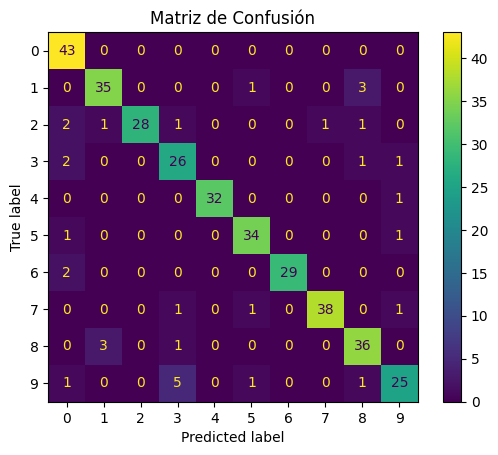

In [19]:
y_pred = [nn.feedforward(x) for x in X_test]
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
plot_confusion_matrix(y_test, y_pred)

Como se puede observar, en el segundo modelo se nota una clara mejoría con respecto al primero:

$$ \text{Accuracy}_{1ermodelo}=0.87$$

$$ \text{Accuracy}_{2domodelo}=0.90$$

Aunque se sigue teniendo en cuenta la inicialización de los datos random.

Ahora para poder observar mejor que tan bien funcionó el segundo modelo dibujando la curva de roc

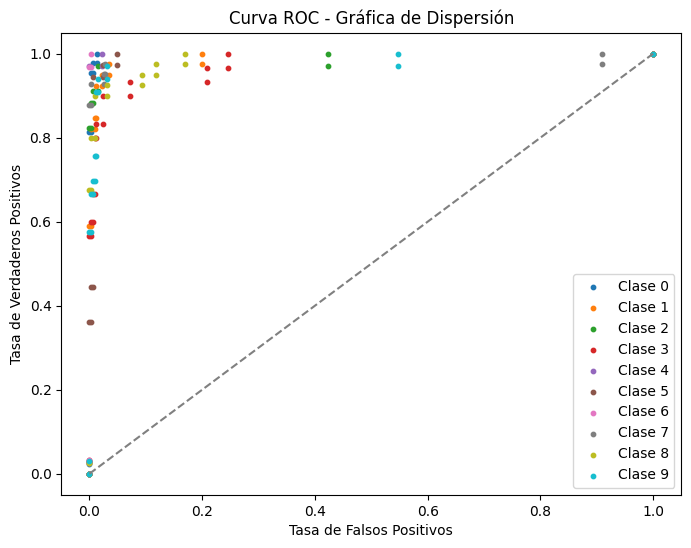

In [20]:
from Neural_Network import visualizations

visualizations.scatter_roc_curve(nn, X_test, y_test)
